In [21]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16

In [22]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [23]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [24]:
X_train = tf.image.resize(np.array(X_train)[..., tf.newaxis], (32, 32))
X_train = np.repeat(X_train, 3, axis=-1)
X_test = tf.image.resize(np.array(X_test)[..., tf.newaxis], (32, 32))
X_test = np.repeat(X_test, 3, axis=-1)


X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0

In [25]:
X_train.shape, X_test.shape

((60000, 32, 32, 3), (10000, 32, 32, 3))

In [26]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [27]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

In [28]:
model = Sequential([
   conv_base,
   Flatten(),
   Dense(256, activation="relu"),
   Dense(10, activation="softmax"),
])

In [29]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


In [31]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    verbose=1,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 8s 20ms/step - loss: 0.6162 - accuracy: 0.7898 - val_loss: 0.4930 - val_accuracy: 0.8207
Epoch 2/10
375/375 [==============================] - 8s 22ms/step - loss: 0.4313 - accuracy: 0.8427 - val_loss: 0.4307 - val_accuracy: 0.8428
Epoch 3/10
375/375 [==============================] - 8s 22ms/step - loss: 0.3950 - accuracy: 0.8553 - val_loss: 0.4146 - val_accuracy: 0.8478
Epoch 4/10
375/375 [==============================] - 8s 22ms/step - loss: 0.3723 - accuracy: 0.8649 - val_loss: 0.3966 - val_accuracy: 0.8538
Epoch 5/10
375/375 [==============================] - 7s 19ms/step - loss: 0.3553 - accuracy: 0.8704 - val_loss: 0.3808 - val_accuracy: 0.8612
Epoch 6/10
375/375 [==============================] - 8s 22ms/step - loss: 0.3403 - accuracy: 0.8761 - val_loss: 0.3876 - val_accuracy: 0.8578
Epoch 7/10
375/375 [==============================] - 8s 22ms/step - loss: 0.3318 - accuracy: 0.8787 - val_loss: 0.3707 - val_accuracy: 0.8641

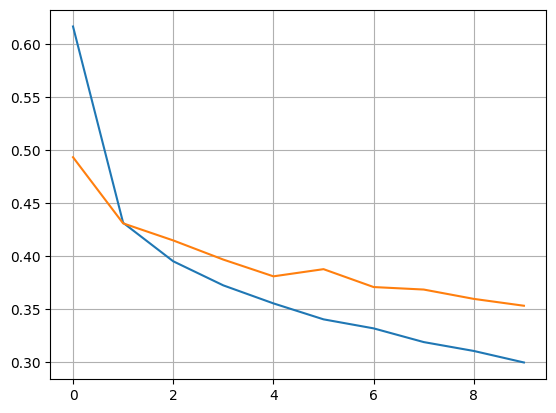

In [32]:
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="valid loss")
plt.grid()

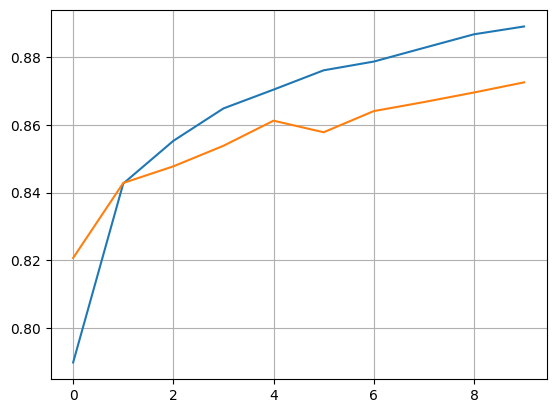

In [33]:
plt.plot(history.history["accuracy"], label="train accuracy")
plt.plot(history.history["val_accuracy"], label="valid accuracy")
plt.grid()

In [34]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [35]:
for i, layer in enumerate(model.layers):
    layer._name = 'layer_' + str(i)


conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


modified_model = Sequential([
   conv_base,
   Flatten(),
   Dense(256, activation="relu"),
   Dense(10, activation="softmax"),
])

In [36]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [37]:
history = model.fit(
    X_train, y_train, epochs=2, verbose=1, batch_size=128, validation_split=0.2
)

Epoch 1/2
375/375 [==============================] - 8s 20ms/step - loss: 0.2705 - accuracy: 0.9010 - val_loss: 0.3430 - val_accuracy: 0.8756
Epoch 2/2
375/375 [==============================] - 7s 18ms/step - loss: 0.2666 - accuracy: 0.9030 - val_loss: 0.3437 - val_accuracy: 0.8760


In [38]:
# Згорткова мережа без використання VGG16 показали краще результат, ніж при використані VGG16